# Assignment 5.1

Brandon Sams
30Sep2020

## Loading the IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()

In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [8]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Encoding the integer sequences into a binary matrix

In [10]:
import numpy as np

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return(results)

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## The model definition

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the model

In [17]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## Configuring the optimizer

In [18]:
from tensorflow.keras import optimizers

In [19]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Using custom losses and metrics

In [20]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [21]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Setting aside a validation set

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training your model

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5188 - acc: 0.7907 - val_loss: 0.3903 - val_acc: 0.8728
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3111 - acc: 0.9010 - val_loss: 0.3097 - val_acc: 0.8847
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2288 - acc: 0.9278 - val_loss: 0.3201 - val_acc: 0.8696
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1814 - acc: 0.9409 - val_loss: 0.2746 - val_acc: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1489 - acc: 0.9535 - val_loss: 0.2771 - val_acc: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1239 - acc: 0.9617 - val_loss: 0.2909 - val_acc: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1015 - acc: 0.9693 - val_loss: 0.3417 - val_acc: 0.8716
Epoch 8/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0879 - a

In [24]:
history_dict = history.history

In [25]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## Plotting the training and validation loss

In [26]:
import matplotlib.pyplot as plt

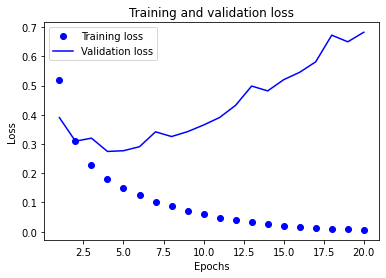

In [27]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Retraining a model from scratch

In [28]:
model  = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 8ms/step - loss: 0.4362 - accuracy: 0.8234
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2638 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2116 - accuracy: 0.9275
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2832 - accuracy: 0.8861


In [29]:
results

[0.2832377851009369, 0.8860800266265869]

In [30]:
model.predict(x_test)

array([[0.25311506],
       [0.9998691 ],
       [0.88098407],
       ...,
       [0.16416034],
       [0.12287349],
       [0.6286283 ]], dtype=float32)